数据降维的其它方法
===

# 1.局部线性嵌入(LLE)
局部线性嵌入（Locally Linear Embedding）是另一种非常有效的非线性降维（NLDR）方法。这是一种流形学习技术，不依赖于像以前算法那样的投影。简而言之，LLE 首先测量每个训练实例与其最近邻（c.n.）之间的线性关系，然后寻找能最好地保留这些局部关系的训练集的低维表示（稍后会详细介绍） 。这使得它特别擅长展开扭曲的流形，尤其是在没有太多噪音的情况下。


## 1.1.工作原理
### 1.1.1.第一步
对于每个训练实例$x^{(i)}$,找到其最近的K个邻居，然后尝试将$x^{(i)}$重构为这些邻居的线性函数。更具体的，找到权重$\omega_{i,j}$，使得$x^{(i)}$和$\sum_{j=1}^m\omega_{i,j}x^{(j)}$之间的平方距离尽可能的小。假设如果$x^{(j)}$不是$x^{(i)}$的k个最近邻时$\omega_{i,j}=0$。建模后有如下条件：
$$
\hat{\Omega}=argmin_{\Omega}\sum_{i=1}^m||x^{(i)}-\sum_{j=1}^m\omega_{i,j}x^{(j)}||^2
$$
约束条件为
$$SubjectTo=\begin{split}
\omega_{i,j}&=0 \\\\
\sum_{j=1}^m\omega_{i,j}&=1,i=1,2,...,m
\end{split}$$
条件一的成立条件是$x^{(j)}$不是$x^{(i)}$的K个邻居，条件二是对每个训练实例的权重进行了归一化

### 1.1.2.第二步
将训练实例投影到一个d维空间(d < n)中去，同时尽可能的保留这些局部关系。如果$z^{(i)}$是$x^{(i)}$在这个d维空间的图像，那么我们想要$z^{(i)}$和$\sum_{j=1}^{m}\hat{w_{i,j}}\ z^{(j)}$之间的平方距离尽可能的小。请注意，Z是包含所有$z^{(i)}$的矩阵。
$$
\hat{Z}=argmin_{Z}\sum_{i=1}^m||z^{(i)}-\sum_{j=1}^{m}\hat{w_{i,j}}z^{(j)}||^2
$$


## 1.2.通过LLE对瑞士卷进行降维

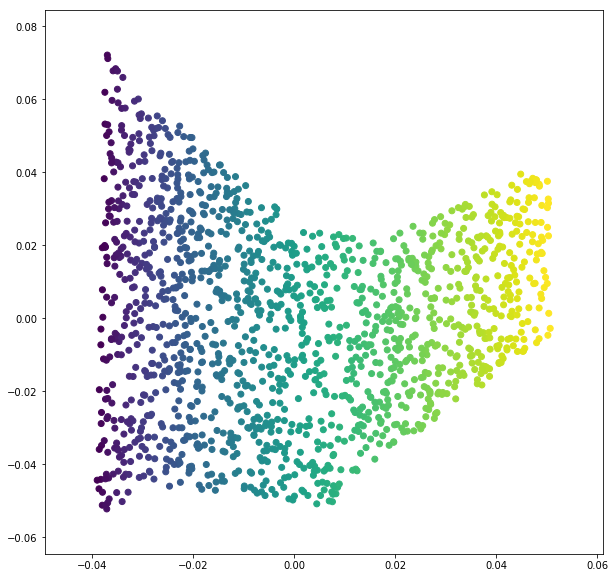

In [6]:
from sklearn.manifold import LocallyLinearEmbedding

plt.figure(figsize=(10,10), facecolor='w')
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_LLE=lle.fit_transform(X)
plt.scatter(X_LLE[:,0], X_LLE[:, 1], c = color)

# 2.多位缩放(MDS)
尝试保持实例之间距离的同时降低了维度

# 3.ISOMAP
通过将每个实例连接到最近的邻居来创建图形，然后在尝试保持实例之间的测地距离时降低维度。

# 4.t-分布随机邻域嵌入(t-Distributed Stochastic Neighbor Embedding，t-SNE)
可以用于降低维​​度，同时试图保持相似的实例临近并将不相似的实例分开。它主要用于可视化，尤其是用于可视化高维空间中的实例

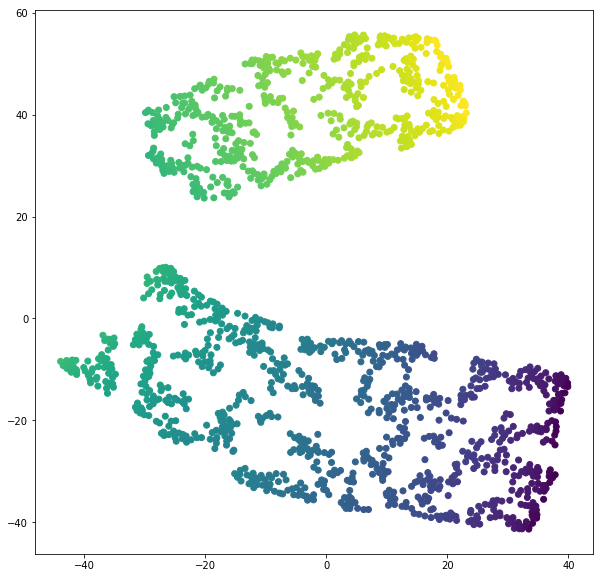

In [ ]:
from sklearn.manifold import TSNE
plt.figure(figsize=(10,10), facecolor='w')
tsne=TSNE(n_components=2)
X_TSNE=tsne.fit_transform(X)
plt.scatter(X_TSNE[:,0], X_TSNE[:, 1], c = color)